# Making Wordclouds

- Presents the list of downloaded pdfs in the folder 'BookDownloads3'
- Lets the user pick one book and produces a wordcloud for that book

In [73]:
import PyPDF2
import os
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
import pdfplumber

# os.chdir(r'BookDownloads3')

In [74]:
pdf_files = []

def get_pdf_files():
    books = os.listdir('.')
    for book in books:
        if book.endswith('.pdf'):
            pdf_files.append(book)

get_pdf_files()            
            
# Presents the list of downloaded pdfs in the folder 'BookDownloads3'
keys = range(1, len(pdf_files) + 1)
values = pdf_files
book_dictionary = dict(zip(keys, values))

pd.DataFrame.from_dict(book_dictionary, orient='index')

,0
1,"(2015) Ashlee Vance - Elon Musk_ Tesla, SpaceX..."
2,"(2015) Ashlee Vance - Elon Musk_ Tesla, SpaceX..."
3,(Bloom’s Modern Critical Interpretations) Haro...
4,(Harry Potter 8) John Tiffany_ Jack Thorne_ J...
5,(Harry Potter 6) J.K. Rowling - Harry Potter a...
6,"(P.S.) Steven D. Levitt, Stephen J. Dubner - F..."
7,Aldous Huxley - Brave New World Revisited (200...
8,Allen Carr - The Easy Way to Stop Smoking_ Joi...
9,"Benjamin Graham, Jason Zweig, Warren E. Buffet..."
10,Bill Bryson - A Short History of Nearly Everyt...


In [75]:
def make_wordcloud(book_number):
    file_name = book_dictionary.get(book_number)
    
    with pdfplumber.open(file_name) as pdf:
        numpages = len(pdf.pages)
        
        book_pages = []
        
        for page in range(numpages):
            page2 = pdf.pages[page]
            text = page2.extract_text()
            
            char_to_replace = {'\t': ' ',
                              '* ': '',
                              '\n': ' '}
            # Iterate over all key-value pairs in dictionary
            for key, value in char_to_replace.items():
                # Replace key character with value character in string
                text = text.replace(key, value)
            
            book_pages.append(text)
            
        str1 = ''.join(str(e) for e in book_pages)
    
        fig = plt.subplots(figsize=(12,10)) 
        wordcloud = WordCloud().generate(str1)
        plt.title(f'The most frequent words in "{file_name}"',
                   fontsize=27)
        plt.imshow(wordcloud)
        plt.axis('off')
        plt.show()
        

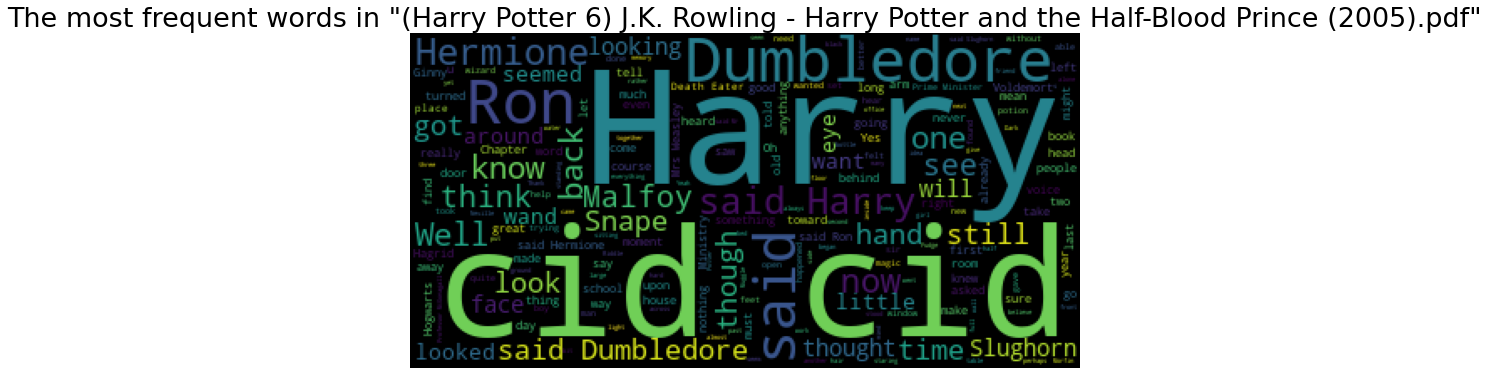

In [76]:
pick_book(5)

In [ ]:
pick_book(5)